<a href="https://colab.research.google.com/github/harleyharry/Social-Media-Engagement-Analysis-/blob/main/Engagement_Analysis_with_necessary_observations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/social_media_engagement1 (1).csv")
df.head()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive


In [ ]:
df.describe()

,post_id,likes,comments,shares
count,100.000000,100.000000,100.00000,100.000000
mean,50.500000,2381.810000,202.66000,415.650000
std,29.011492,1632.573284,138.84067,283.877601
min,1.000000,15.000000,10.00000,16.000000
25%,25.750000,895.750000,89.75000,183.000000
50%,50.500000,2220.000000,171.00000,356.500000
75%,75.250000,3593.250000,299.00000,689.500000
max,100.000000,5000.000000,500.00000,993.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          100 non-null    int64 
 1   platform         100 non-null    object
 2   post_type        100 non-null    object
 3   post_time        100 non-null    object
 4   likes            100 non-null    int64 
 5   comments         100 non-null    int64 
 6   shares           100 non-null    int64 
 7   post_day         100 non-null    object
 8   sentiment_score  100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:

df['sentiment_score'] = df['sentiment_score'].astype(str).str.strip().str.lower()


print("After normalization:", df['sentiment_score'].unique())

sentiment_map = {'positive': 0, 'neutral': 1, 'negative': 2}
df['sentiment_score'] = df['sentiment_score'].map(sentiment_map)

print("After mapping:", df['sentiment_score'].value_counts(dropna=False))


After normalization: ['positive' 'neutral' 'negative']
After mapping: sentiment_score
0    46
1    27
2    27
Name: count, dtype: int64


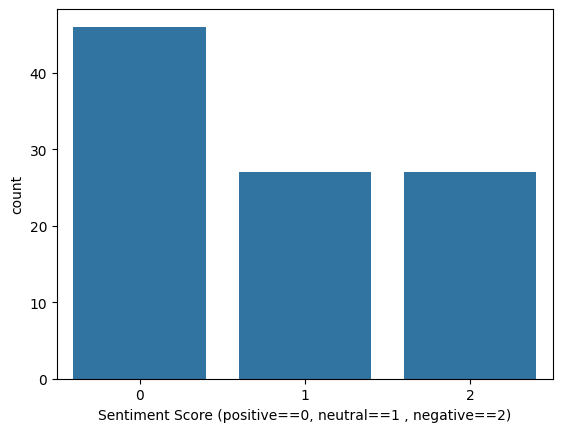

In [ ]:
sns.countplot(x=df['sentiment_score'], order=[0, 1, 2])
plt.xlabel('Sentiment Score (positive==0, neutral==1 , negative==2)')
plt.show()


**observation 1**: People are more positive online, than being neutral or negative about things(which is good)


In [ ]:

df['platform'] = df['platform'].astype(str).str.strip().str.lower()


print("After normalization:", df['platform'].unique())


platform_map = {'facebook': 0, 'instagram': 1, 'twitter': 2}

df['platform'] = df['platform'].map(platform_map)

print("After mapping:", df['platform'].value_counts(dropna=False))


After normalization: ['facebook' 'instagram' 'twitter']
After mapping: platform
1    36
0    32
2    32
Name: count, dtype: int64


<Axes: title={'center': 'Platform Distribution'}>

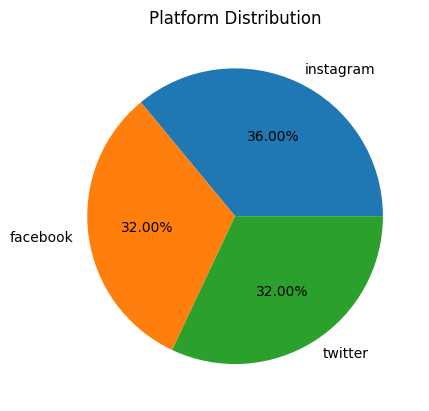

In [ ]:

label_map = {0: 'facebook', 1: 'instagram', 2: 'twitter'}

df['platform'].value_counts().rename(index=label_map).plot(
    kind='pie',
    autopct='%.2f%%',
    ylabel='',
    title='Platform Distribution'
)


**observation 2**: There is no linear relationship between likes , comments and shares. Intuitively, we might think, the post which gets low likes  will not be shared as much(which turned out to be untrue)


****

/tmp/ipython-input-14-1042515374.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([platform_labels.get(x, x) for x in df['platform'].unique()])
/tmp/ipython-input-14-1042515374.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([sentiment_labels.get(y, y) for y in ax.get_yticks()])


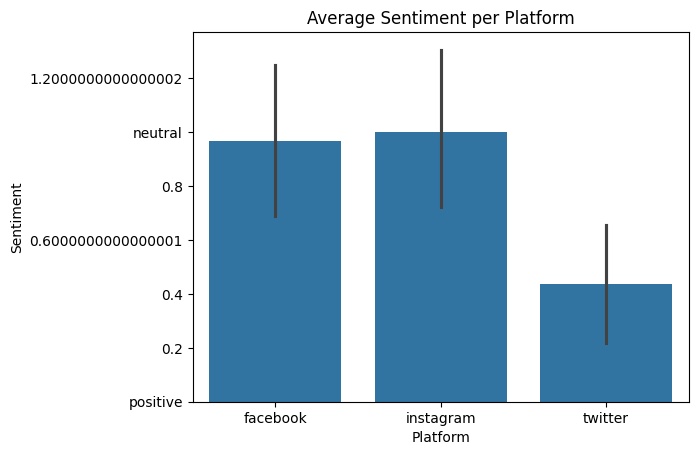

In [ ]:

platform_labels = {0: 'facebook', 1: 'instagram', 2: 'twitter'}
sentiment_labels = {0: 'positive', 1: 'neutral', 2: 'negative'}

ax = sns.barplot(x='platform', y='sentiment_score', data=df)


ax.set_xticklabels([platform_labels.get(x, x) for x in df['platform'].unique()])
ax.set_yticklabels([sentiment_labels.get(y, y) for y in ax.get_yticks()])

ax.set_xlabel("Platform")
ax.set_ylabel("Sentiment")

plt.title("Average Sentiment per Platform")
plt.show()


**observation 3**: people are more positive in twitter !


In [ ]:
df['net_engagement'] = df['likes'] + df['comments'] + df['shares']

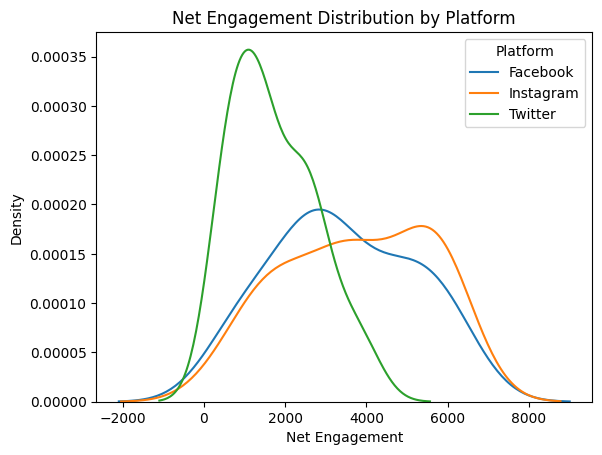

In [ ]:
sns.kdeplot(data=df[df['platform'] == 0], x='net_engagement', label='Facebook')
sns.kdeplot(data=df[df['platform'] == 1], x='net_engagement', label='Instagram')
sns.kdeplot(data=df[df['platform'] == 2], x='net_engagement', label='Twitter')

# Add legend to show which color represents which platform
plt.legend(title='Platform')

# Optional enhancements
plt.xlabel('Net Engagement')
plt.ylabel('Density')
plt.title('Net Engagement Distribution by Platform')

plt.show()

**observation 4**: Though twitter has highest engagement density; Instagram leads the graph in numbers

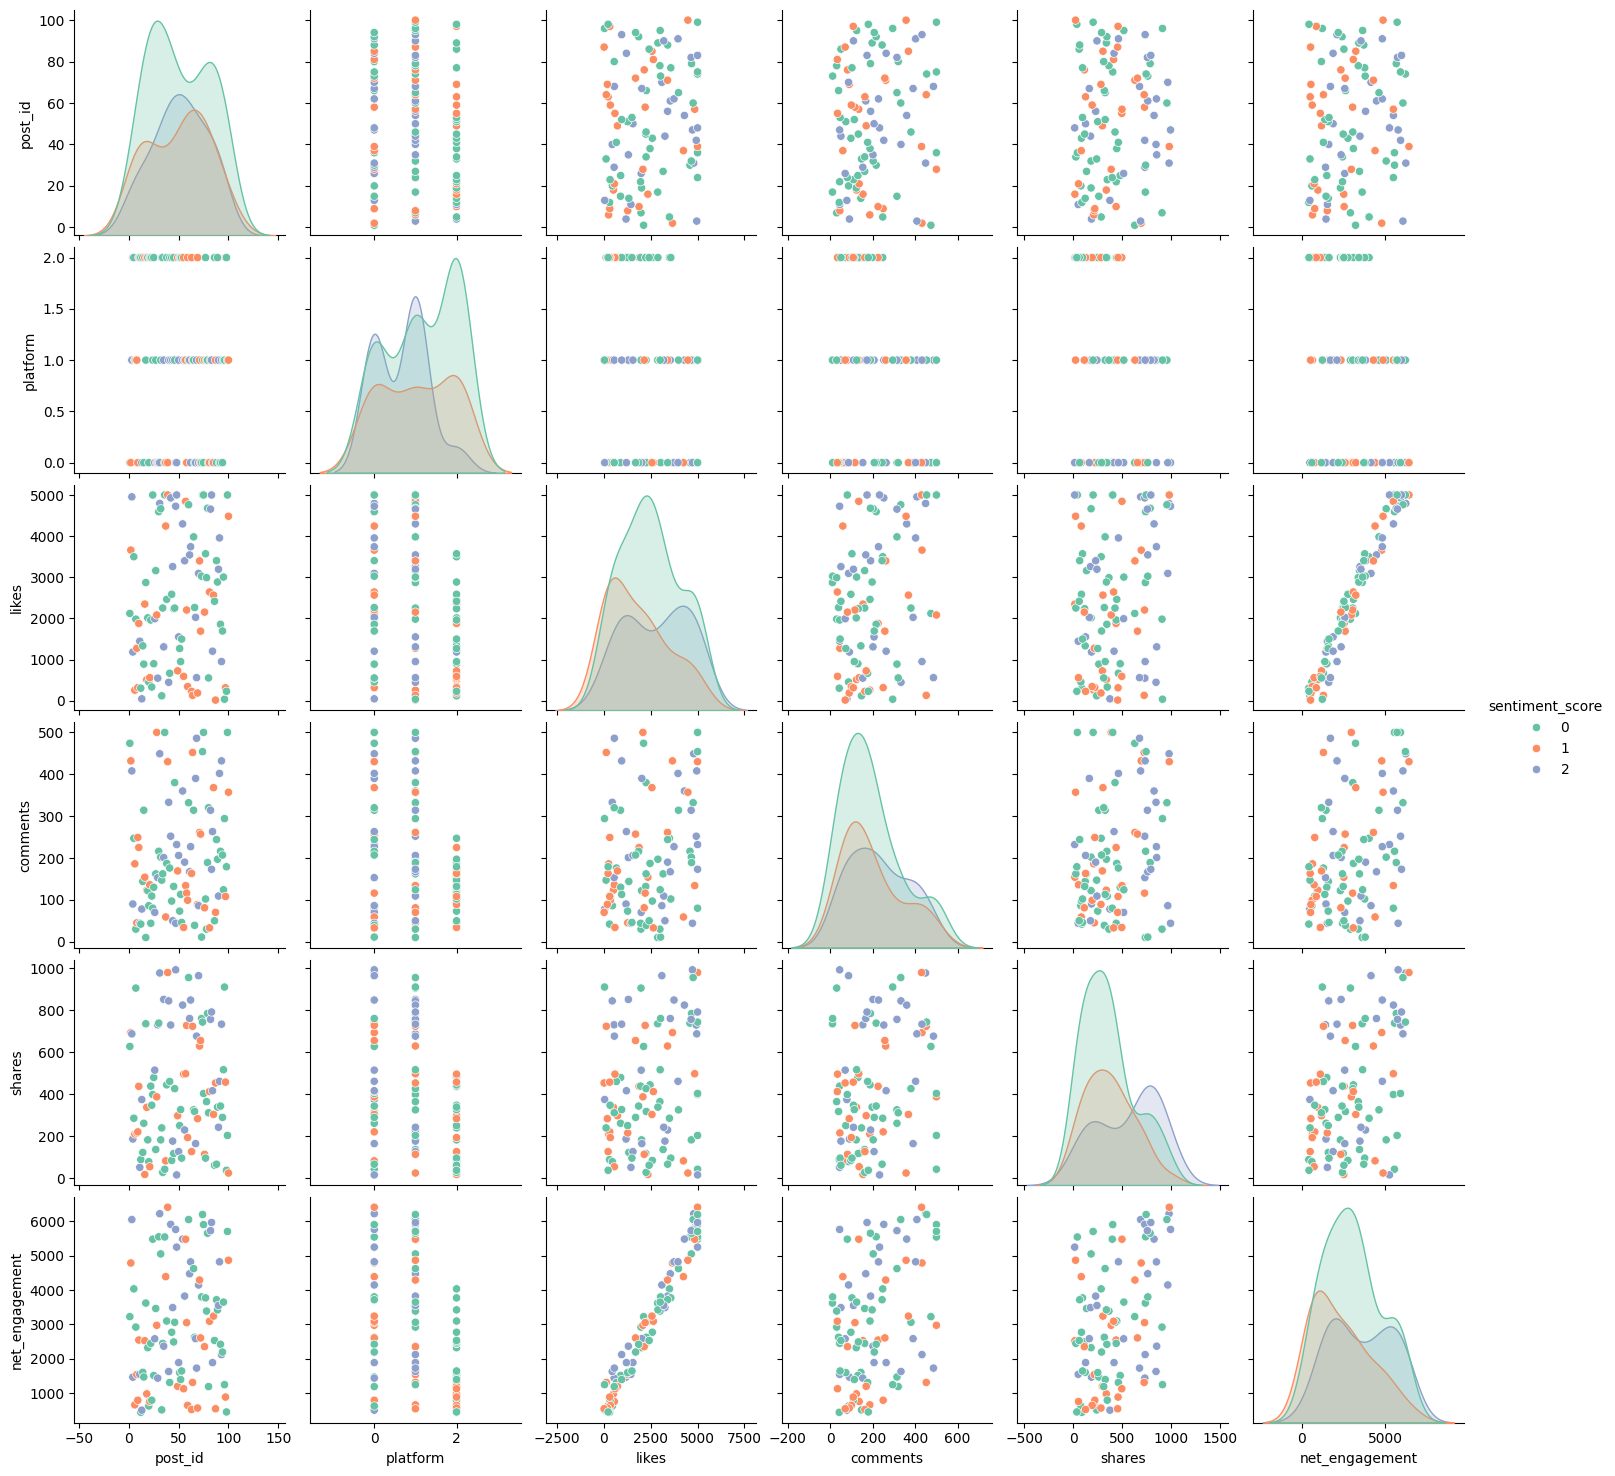

In [ ]:
sns.pairplot(df,hue='sentiment_score',palette="Set2"   )

In [ ]:
pivot = df.pivot_table(index='post_day', values='net_engagement', aggfunc='mean')

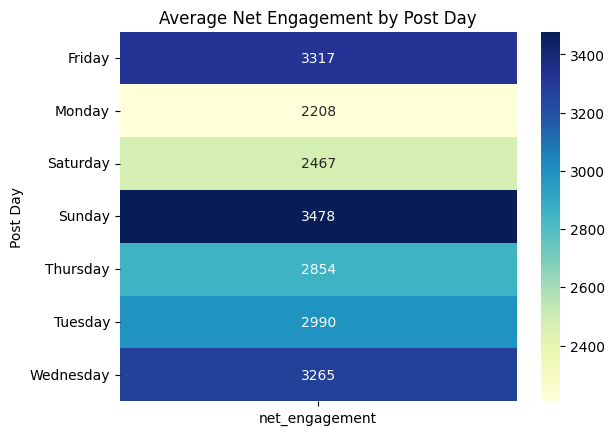

In [ ]:
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")


plt.title("Average Net Engagement by Post Day")
plt.ylabel("Post Day")
plt.xlabel("")

plt.show()

**observation 5**: people are free on sundays


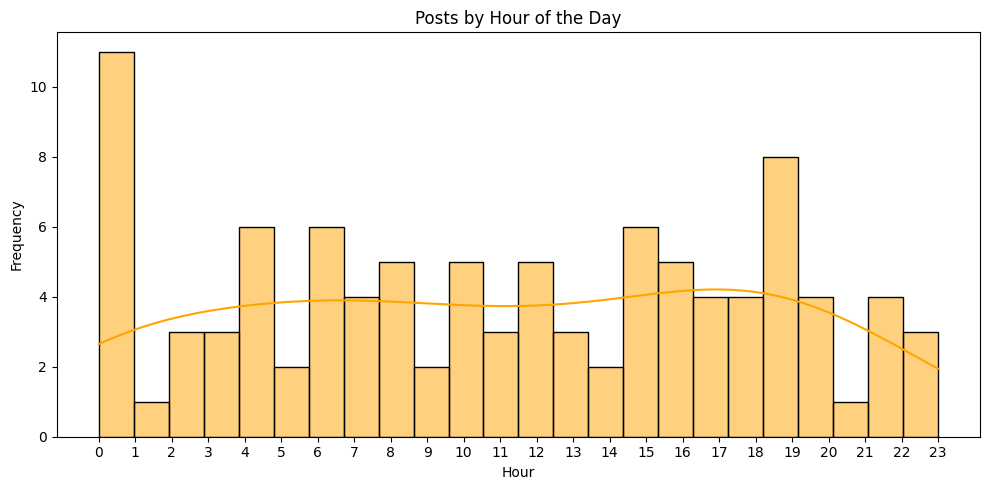

In [ ]:
df['post_time'] = pd.to_datetime(df['post_time'], errors='coerce')

# Step 2: Extract hour of the day
df['post_hour'] = df['post_time'].dt.hour
plt.figure(figsize=(10, 5))
sns.histplot(df['post_hour'], bins=24, kde=True, color='orange')
plt.title('Posts by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

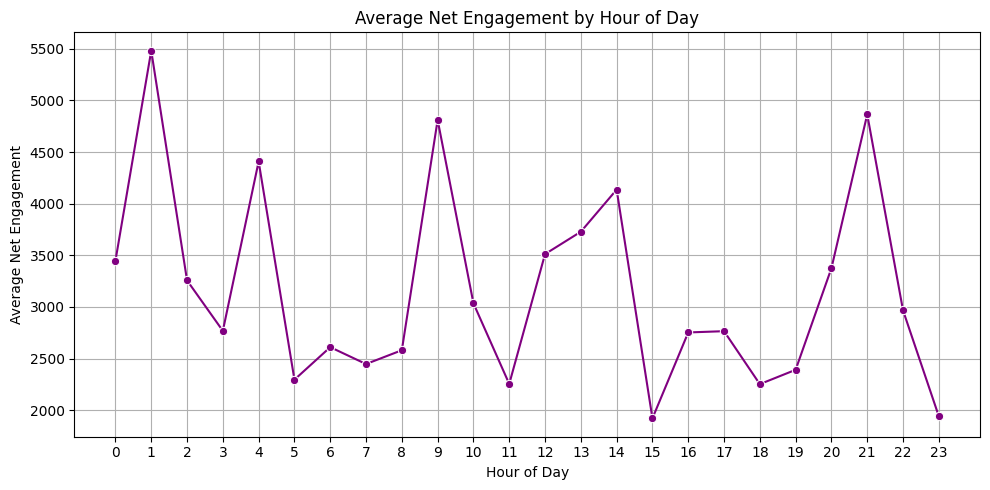

In [ ]:



df['post_time'] = pd.to_datetime(df['post_time'], errors='coerce')
df['post_hour'] = df['post_time'].dt.hour


hourly_engagement = df.groupby('post_hour')['net_engagement'].mean().reset_index()


plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_engagement, x='post_hour', y='net_engagement', marker='o', color='purple')
plt.title('Average Net Engagement by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Net Engagement')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


**observation 7**: posting at 12:01AM might be a good strategy for engagement